# SIG720 - Machine Learning
## Task C1 (Credit Task 1)

#### Submitted by:
#### **Surya Pradeep Kumar Varma**
#### Deakin ID - **223020011**
#### Attempt # **1**
#### Email Address - suryapradeepv@gmail.com

# Index

[i. Load the Data](#i.-Load-the-Data)<br>
[1. Subgroups according to columns 3 to 205](#1.-Subgroups-according-to-columns-3-to-205)<br>
[2. Curse of dimensionality problem](#2.-Curse-of-Dimensionality-problem)<br>
[3. Computation of Variance Explained by Principal Components](#3.-Computation-of-Variance-Explained-by-the-Principal-Componentss)<br>
[4. ML Modelling (obesity data)](#4.-ML-Modelling)<br>
<br>
[References](#References)

## i. Load the Data

In [1]:
# Import essential libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("./SCADI.csv")
df.head(7)

Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   
5       0   18         0         1         0         0         0         0   
6       0   15         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   
2         0         0  ...          0          0        0        0        0   
3         0         0  ...          0          0        0        0        1   
4         0         0  ...          0          0        0        0        1   
5         0         0  ...          0          0        1        0        0   
6         0         0  ...          0          0        0        0        0   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0        0        1        0        0   class6  
1        1        0        0        0   class6  
2        1        0        0        0   class6  
3        0        0        0        0   class6  
4        0        0        0        0   class6  
5        0        0        0        0   class2  
6        0        1        0        0   class6  

[7 rows x 206 columns]

In [3]:
df.shape  # 70 data points, 206 columns

(70, 206)

> We have a large number of dimensions w.r.t data points, just 70 rows and 205 different features and one target class. This is the problem of **curse of dimensionality**. We have to address this by performing dimensionality reduction later.

In [4]:
df.describe()

Gender        Age   d 5100-0   d 5100-1   d 5100-2   d 5100-3  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean    0.414286  12.257143   0.071429   0.142857   0.271429   0.171429   
std     0.496155   3.626336   0.259399   0.352454   0.447907   0.379604   
min     0.000000   6.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   9.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000  12.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000  15.000000   0.000000   0.000000   1.000000   0.000000   
max     1.000000  22.000000   1.000000   1.000000   1.000000   1.000000   

        d 5100-4  d 5100-8  d 5100-9  d 5101-0  ...  d 57022-4  d 57022-8  \
count  70.000000      70.0      70.0      70.0  ...  70.000000       70.0   
mean    0.342857       0.0       0.0       0.0  ...   0.014286        0.0   
std     0.478091       0.0       0.0       0.0  ...   0.119523        0.0   
min     0.000000       0.0       0.0       0.0  ...   0.000000        0.0   
25%     0.000000       0.0       0.0       0.0  ...   0.000000        0.0   
50%     0.000000       0.0       0.0       0.0  ...   0.000000        0.0   
75%     1.000000       0.0       0.0       0.0  ...   0.000000        0.0   
max     1.000000       0.0       0.0       0.0  ...   1.000000        0.0   

       d 57022-9    d 571-0    d 571-1    d 571-2    d 571-3    d 571-4  \
count       70.0  70.000000  70.000000  70.000000  70.000000  70.000000   
mean         0.0   0.114286   0.328571   0.314286   0.157143   0.085714   
std          0.0   0.320455   0.473085   0.467583   0.366563   0.281963   
min          0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
25%          0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
50%          0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
75%          0.0   0.000000   1.000000   1.000000   0.000000   0.000000   
max          0.0   1.000000   1.000000   1.000000   1.000000   1.000000   

       d 571-8  d 571-9  
count     70.0     70.0  
mean       0.0      0.0  
std        0.0      0.0  
min        0.0      0.0  
25%        0.0      0.0  
50%        0.0      0.0  
75%        0.0      0.0  
max        0.0      0.0  

[8 rows x 205 columns]

In [5]:
df.columns[df.isna().sum() != 0]  # no columns with mising values

Index([], dtype='object')

In [6]:
# Given last column is the classes, is the ground truth

y = df["Classes"]
df["Classes"].value_counts()

Classes
class6    29
class7    16
class4    12
class2     7
class5     3
class1     2
class3     1
Name: count, dtype: int64

In [7]:
df["Classes"].unique(), len(df["Classes"].value_counts())

(array(['class6', 'class2', 'class4', 'class7', 'class1', 'class5',
        'class3'], dtype=object),
 7)

> **Classes are imbalanced; There are 7 different groups with a imbalanced dataset**

In [8]:
y.head(7)

0    class6
1    class6
2    class6
3    class6
4    class6
5    class2
6    class6
Name: Classes, dtype: object

In [9]:
# Rename the other columns as features

X = df.drop("Classes", axis=1)  # features df
X.head(7)

Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   
5       0   18         0         1         0         0         0         0   
6       0   15         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-4  d 57022-8  d 57022-9  d 571-0  d 571-1  \
0         0         0  ...          0          0          0        0        0   
1         0         0  ...          0          0          0        0        0   
2         0         0  ...          0          0          0        0        0   
3         0         0  ...          0          0          0        0        0   
4         0         0  ...          0          0          0        0        0   
5         0         0  ...          0          0          0        1        0   
6         0         0  ...          0          0          0        0        0   

   d 571-2  d 571-3  d 571-4  d 571-8  d 571-9  
0        0        0        1        0        0  
1        0        1        0        0        0  
2        0        1        0        0        0  
3        1        0        0        0        0  
4        1        0        0        0        0  
5        0        0        0        0        0  
6        0        0        1        0        0  

[7 rows x 205 columns]

## 1. Subgroups according to columns 3 to 205

In [10]:
X_subset = X.drop(["Gender", "Age"], axis=1)
X_subset.head(3)  # 203 columns from 3 to 205

d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 571-3  d 571-4  d 571-8  d 571-9  
0        0        0        0        0        1        0        0  
1        0        0        0        1        0        0        0  
2        0        0        0        1        0        0        0  

[3 rows x 203 columns]

#### Subgroups using no. of unique values in selected columns

In [11]:
num_subgroups = X_subset.nunique().sum()

num_subgroups

343

> We can see that there are 343 different subgroups when considering 3 to 205 columns. And we have seen that from the 206the attribute. We only have 7 unique classes in the labels

#### Also trying grouping with kmeans clustering instead of direct subgroups

In [12]:
#!pip -q install yellowbrick

# We use YellowBrick library
# to draw the silhouette plots and perform comparative analysis
from yellowbrick.cluster import SilhouetteVisualizer

Refer for yellowbrick docs: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html?highlight=silhouette

In [13]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
# Calculate Silhouette Coefficient for different number of clusters
for k in range(2, 9):
    # Create KMeans instance for different number of clusters    
    clusterer = KMeans(n_clusters=k, init='k-means++', n_init='warn', max_iter=300, random_state=7)
    cluster_labels = clusterer.fit_predict(X_subset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_subset, cluster_labels)
    print(f"For n_clusters {k}, The average silhouette_score is: {silhouette_avg:.5f}")

For n_clusters 2, The average silhouette_score is: 0.22910
For n_clusters 3, The average silhouette_score is: 0.26013
For n_clusters 4, The average silhouette_score is: 0.26920
For n_clusters 5, The average silhouette_score is: 0.28200
For n_clusters 6, The average silhouette_score is: 0.26198
For n_clusters 7, The average silhouette_score is: 0.18344
For n_clusters 8, The average silhouette_score is: 0.18612


> **The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.**

<h3><b>Checking from the silhouette coefficient value is best for 5 clusters indicating relatively well-seperated clusters with least number of clusters. Next we can check in the silhouette plots to determine optimum number of clusters</b></h3>

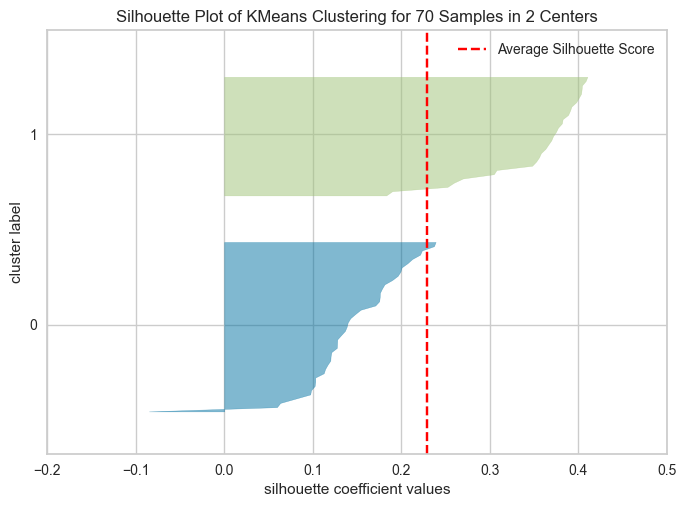

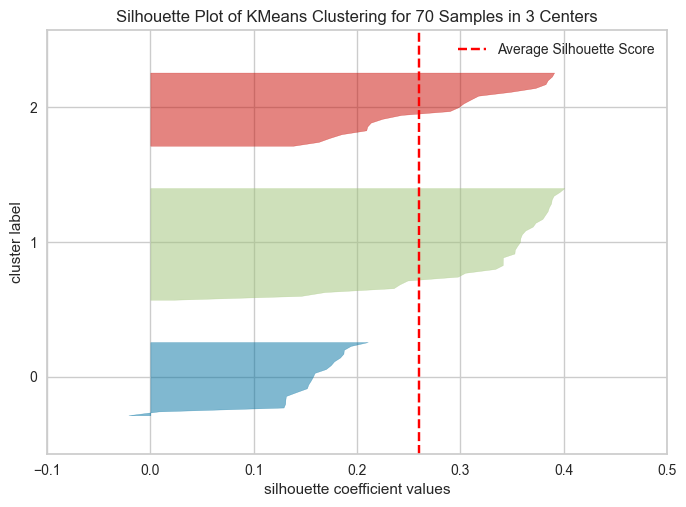

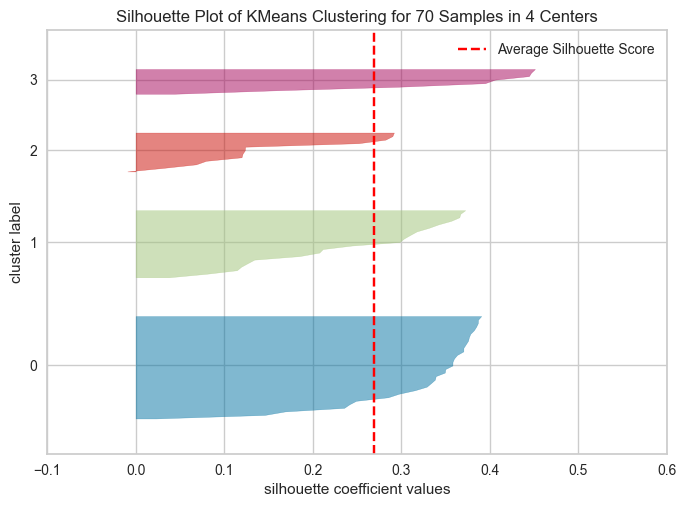

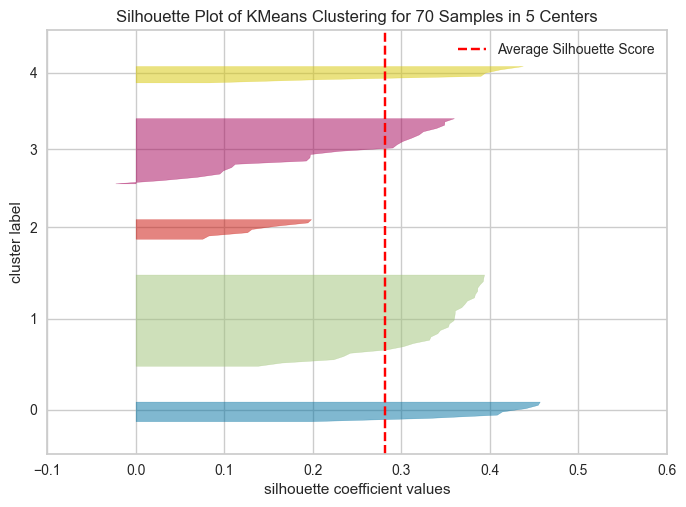

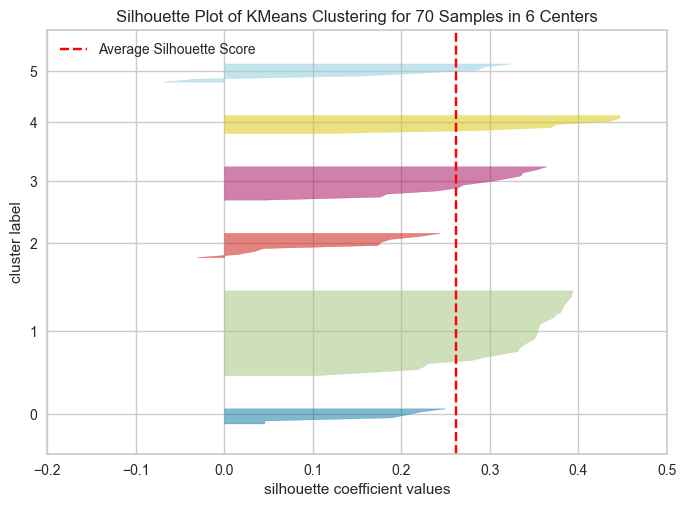

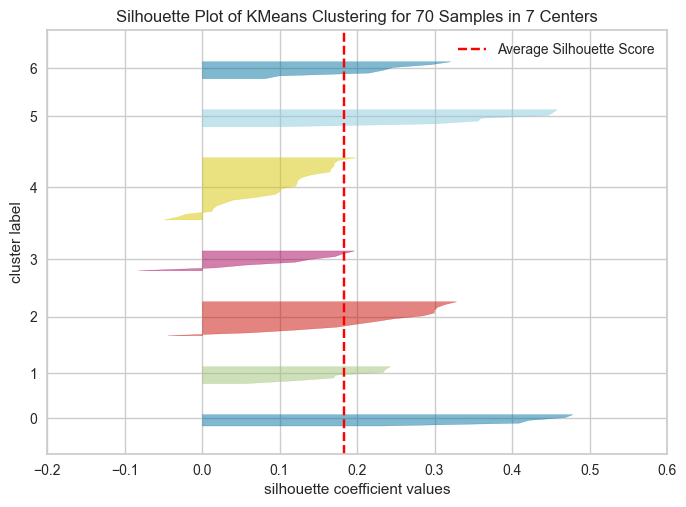

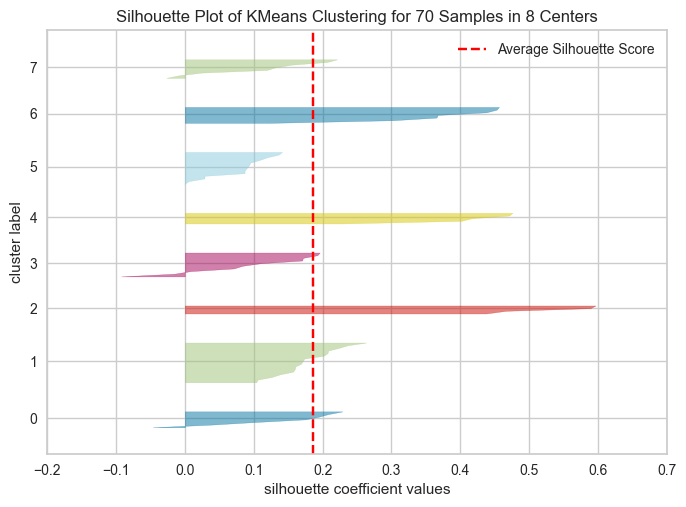

In [15]:
# Visualize Silhouette plots for different number of clusters

for k in range(2, 9):
    # Create KMeans instance for different number of clusters    
    clusterer = KMeans(n_clusters=k, init='k-means++', n_init='warn', max_iter=300, random_state=7)
    cluster_labels = clusterer.fit_predict(X_subset)

    # Create SilhouetteVisualizer instance with KMeans instance and Fit the visualizer
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
    visualizer.fit(X_subset)
    visualizer.show()

### Optimal number of clusters: 
* **3** seems to be suboptimal as:
    * Thicknes of clusters or number of values in clusters varies with some thicker and other thinner clusters
    * One cluster has score lesser than average
* **4** also seems to suboptimal as:
    * Thicknes of clusters or number of values in clusters varies with some thicker and other thinner clusters
* **5** has the best avg. score:
    * Although it has the best avg. score, there are negative values in some clusters
    * But the thickness of clusters varies widely. One cluster is very thick
*  **7** has a much lower avg. silhouette score
* Hence **6** is the optimal number of clusters:
    * Good avg. silhouette score
    * Thickness is comparitively better

In [16]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [17]:
num_clusters = 6  # optimal clusters

In [18]:
# Kmeans++ initialization

clusterer = KMeans(n_clusters=num_clusters, init='k-means++', n_init='warn', max_iter=300, random_state=10)
cluster_labels = clusterer.fit_predict(X_subset)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_subset, cluster_labels)
print(f"For n_clusters {num_clusters}, \nThe average silhouette score: {silhouette_avg:.8f}")
print(f"purity_score: {purity_score(y, cluster_labels):.8f}")

For n_clusters 6, 
The average silhouette score: 0.26872377
purity_score: 0.82857143


> **We can see that for the 6 number of clusters, we have good silhouette score and purity_score**

> **This is because the separation of some of the classes in the gt might not be too good because we have too few data points in a few classes. Also, overall there are very few data points to be able to infer a meaningful pattern out of them. Along with a curse of dimensionality problem.**

## 2. Curse of Dimensionality problem

#### The term "Curse of Dimensionality" refers to the explosive nature of increasing data dimensions and the subsequent exponential increase in computer work required for processing and/or analysis. Richard E. Bellman coined the term to describe the increase in volume of Euclidean space associated with adding extra dimensions in the field of dynamic programming. This phenomena is now being observed in domains such as machine learning, data analysis, and data mining, to mention a few. In principle, increasing the dimensions adds more information to the data, boosting its quality, but it actually increases noise and redundancy during analysis.

#### A feature of an item in machine learning might be an attribute or a characteristic that defines it. Each characteristic represents a dimension, and a collection of dimensions forms a data point. This is a feature vector that defines the data point that will be used by a machine learning algorithm (or algorithms). When we talk about increasing dimensionality, we mean increasing the amount of characteristics utilised to describe the data. In the realm of breast cancer research, for example, age and the number of malignant nodes can be used as features to determine a patient's prognosis. A feature vector's dimensions are made up of these features. However, other factors such as previous surgeries, patient history, tumour kind, and other such characteristics assist a doctor in making a diagnosis are adding dimensions to data

#### Hughes (1968) in his study concluded that with a fixed number of training samples, the predictive power of any classifier first increases as the number of dimensions increase, but after a certain value of number of dimensions, the performance deteriorates. Thus, the phenomenon of curse of dimensionality is also known as Hughes phenomenon.

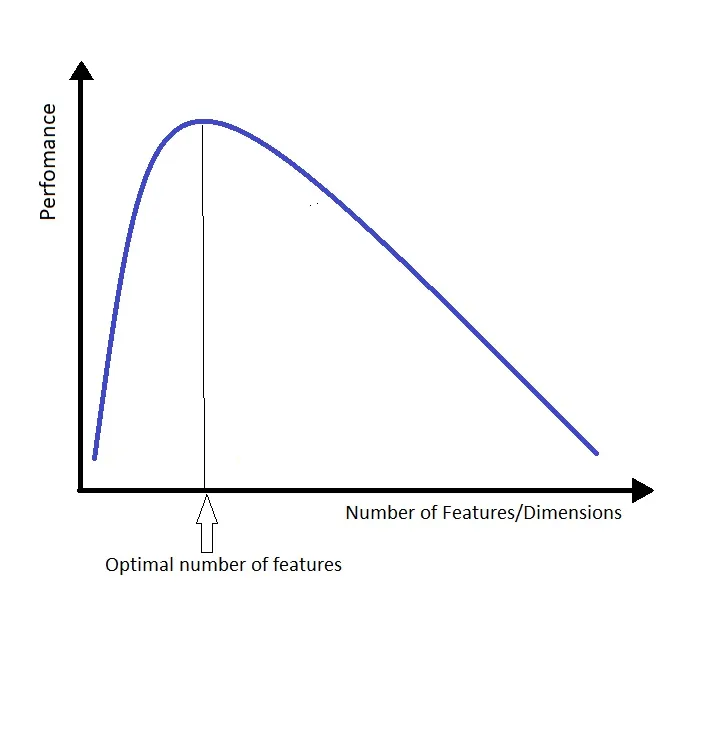

#### A range of approaches known as 'Dimensionality reduction techniques' are employed to alleviate the issues associated with high dimensional data. Dimensionality reduction approaches are classified into two types: "feature selection" and "feature extraction."
##### **Feature Selection:** Low Variance Filter, High Correlation Filter, Multicollinearity, Feature Ranking

##### **Feature Ranking:** PCA, Factor Analysis, Independent component analysis, t-SNE


## i. Normalizing data

Normalizing before PCA is very important

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled.shape

(70, 205)

## ii. PCA

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = 70

# Storing PCA function with n components
pca = PCA(n_components = n, random_state = 7)

# Applying PCA on scaled data
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))       

pca_components = pd.DataFrame(pca.components_)
pca_components.shape

(70, 205)

In [22]:
# The percentage of variance explained by each principal component is stored
from pprint import pprint

var_exp = (pca.explained_variance_ratio_)
pprint(var_exp, compact=True)

array([1.86694858e-01, 1.38438258e-01, 9.17579162e-02, 5.52091418e-02,
       4.71110286e-02, 4.33741972e-02, 3.65885762e-02, 3.10070955e-02,
       2.90364928e-02, 2.77491608e-02, 2.52250448e-02, 2.35961441e-02,
       2.18405625e-02, 1.97756859e-02, 1.71228645e-02, 1.70162514e-02,
       1.49171694e-02, 1.35681215e-02, 1.29999914e-02, 1.22299499e-02,
       1.19545610e-02, 9.60702809e-03, 9.30895071e-03, 7.98404089e-03,
       7.49014950e-03, 7.24567242e-03, 6.78822094e-03, 6.24763870e-03,
       6.05267818e-03, 5.58696452e-03, 5.04593880e-03, 4.70094414e-03,
       4.53654675e-03, 4.21438782e-03, 3.70300736e-03, 3.51119815e-03,
       3.25861551e-03, 3.12107763e-03, 2.64774985e-03, 2.28096343e-03,
       2.02247631e-03, 1.92829870e-03, 1.88342933e-03, 1.83591703e-03,
       1.66520127e-03, 1.55167966e-03, 1.14841645e-03, 1.00779557e-03,
       9.32224131e-04, 8.58188785e-04, 7.21345128e-04, 6.68171882e-04,
       5.53046360e-04, 4.50822243e-04, 4.19943711e-04, 3.66307745e-04,
      

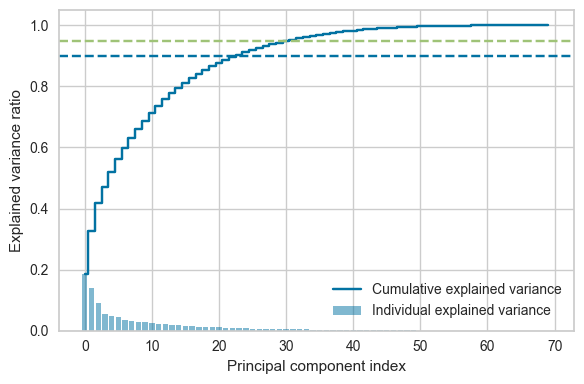

In [23]:
# Cumulative percentage explained by Principal components plot

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.axhline(y=0.9, color='b', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> This plot shows the cumulative percentage of variance explaiend by each additional principal component. We can see that arund 15 principal components are enough to account for approx. 82% of the variance. Also, around 23 principal components explain 90% of the variance and 30 principal components are able to explain a total of 95% of variance of the data. This means, after doing dimensionality reduction with **PCA** we're able to effectively use just 30 principal components instead of the original 70 dimensions

> **This shows that we indeed have a curse of dimensionality problem where having additional features doesn't add to the predictive power of the overall model considering those additional features**

### iii. t-SNE

In [24]:
from sklearn.manifold import TSNE

# Initialize t-SNE with 2 components
k = 2
tsne = TSNE(n_components=k, random_state=7)

# Apply t-SNE to the data
X_tsne = tsne.fit_transform(X_scaled)

# good small value of kl divergence
print(f"NO. of components {k} | KL Divergence {tsne.kl_divergence_:.5f}")

NO. of components 2 | KL Divergence 0.09370


### iv. Visualize in 2D plot to check for dimensionality and loss of information

> To illustrate the problem, let's consider a two-dimensional plot. Since the dataset has 203 dimensions, we cannot directly visualize it in a traditional scatter plot.

 > However, we can apply dimensionality reduction techniques like PCA and t-SNE to project the dataset onto a lower-dimensional space, such as a 2D space. By applying PCA and t-SNE, we can transform the dataset into a reduced number of components while preserving the most important information. Then, We can then plot the data in this reduced 2D space. 

In [25]:
# visualize first two components of t-sne and PCA w.r.t target variable y

# !pip install plotly
import plotly.express as px

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE first two components visualization",
    xaxis_title="First t-SNE component",
    yaxis_title="Second t-SNE component",
    width=800, height=400
)

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=30),
    paper_bgcolor="white",
)
fig.show()

fig = px.scatter(x=X_pca[0], y=X_pca[1], color=y)
fig.update_layout(
    title="PCA first two components visualization",
    xaxis_title="First PCA component",
    yaxis_title="Second PCA component",
    width=800, height=400
)

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=30),
    paper_bgcolor="white",
)
fig.show()

> **We can see that the clusters are indeed clearly separated when visualized using just two components of PCA and t-SNE. Thus confirming the presence of curse of dimensionality problem.**

> The loss of information can be measured by comparing the explained variance ratio of the original data with that of the reduced data (in 2D). The reduction in the explained variance indicates the loss of information due to dimensionality reduction

> It's important to note that such a plot will only capture a subset of the information present in the original high-dimensional dataset, resulting in a loss of information.

## 3. Computation of Variance Explained by the Principal Components

#### The percentage of variance for the first N components in PCA is computed based on the eigenvalues of the covariance matrix. Steps:


> 1. Compute the covariance matrix of the original dataset
> 2. Perform an eigendecomposition (SVD) of the covariance matrix, which yields eigenvalues and eigenvectors.
> 3. Sort the eigenvalues in descending order and calculate the total sum of all eigenvalues.
> 4. Compute the cumulative sum of the eigenvalues up to the Nth component.
> 5. After getting the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of 
eigenvalues.
<br>
> Percentage of Variance: The percentage of variance explained by each principal component is calculated by dividing its eigenvalue by the sum o **The percentage of variance explained by the first N components indicates how much information is retained when reducing the dataset dimensionality.**f all eigenvalues.

> **Percentage of Variance Explained by PCi = (Eigenvalue of PCi) / (Sum of all Eigenvalues)**

> Cumulative Variance: Often, we are interested in the cumulative variance explained by a subset of principal components. This is useful to determine how much information is retained when using a certain number of principal components. The cumulative variance for the first k principal components is obtained by summing the percentage of variance explained by those components.

> **Cumulative Variance (N) (X%) = Sum of the Percentage of VariaNce for the first N principal components**

> By analyzing the percentage of variance explained by each principal component, one can make an informed decision about how many principal components to retain for dimensionality reduction. Higher percentages indicate that a larger proportion of the original dataset’s variance is captured by the reduced components after reduction. Typically, a cumulative variance of around 95% or higher is considered a good choice, as it retains most of the information from the original data while reducing the dimensions

## 4. ML Modelling

#### Dataset description: This dataset includes data for the estimation of obesity levels in individuals based on their eating habits and physical condition. The data contains 17 attributes and 2111 records.

#### Features and labels: The attribute names are listed below. The description of the attributes can be found in this article:
[web link](!https://www.sciencedirect.com/science/article/pii/S2352340919306985)

In [26]:
# Load obesity dataset
import pandas as pd

df = pd.read_csv("ObesityDataSet.csv")
df.shape

(2111, 17)

In [27]:
df.info()  # no missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [28]:
df.head(5)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [29]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [30]:
df["NObeyesdad"]

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [31]:
# dropping NObeyesdad feature as required

df.drop(["NObeyesdad"], inplace=True, axis=1)
df.shape

(2111, 16)

In [32]:
# target variable for prediction is "weight"
# seperating features and target

y = df["Weight"]
X = df.drop(["Weight"], axis=1)
X.shape, y.shape

((2111, 15), (2111,))

### i. Check target distribution

In [33]:
y.sample(10)

1999    133.644711
90       93.000000
1299     88.126544
189      62.000000
743      53.783977
86       83.000000
279      52.000000
129      78.000000
202     102.000000
1659    121.658729
Name: Weight, dtype: float64

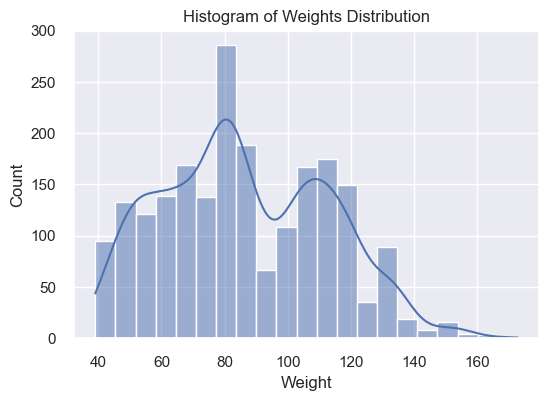

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(6, 4))
plt.title("Histogram of Weights Distribution")
sns.histplot(y, kde = True)
plt.show()

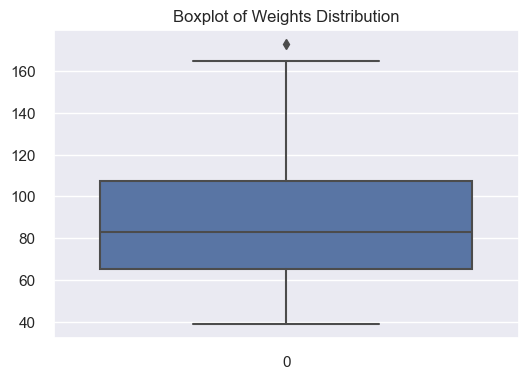

In [35]:
plt.figure(figsize=(6, 4))
plt.title("Boxplot of Weights Distribution")
sns.boxplot(y)
plt.show()

> It seems to have a bimodal normal distribution for the weight. There do not seem to be many outliers present as well

### ii. Pairplot

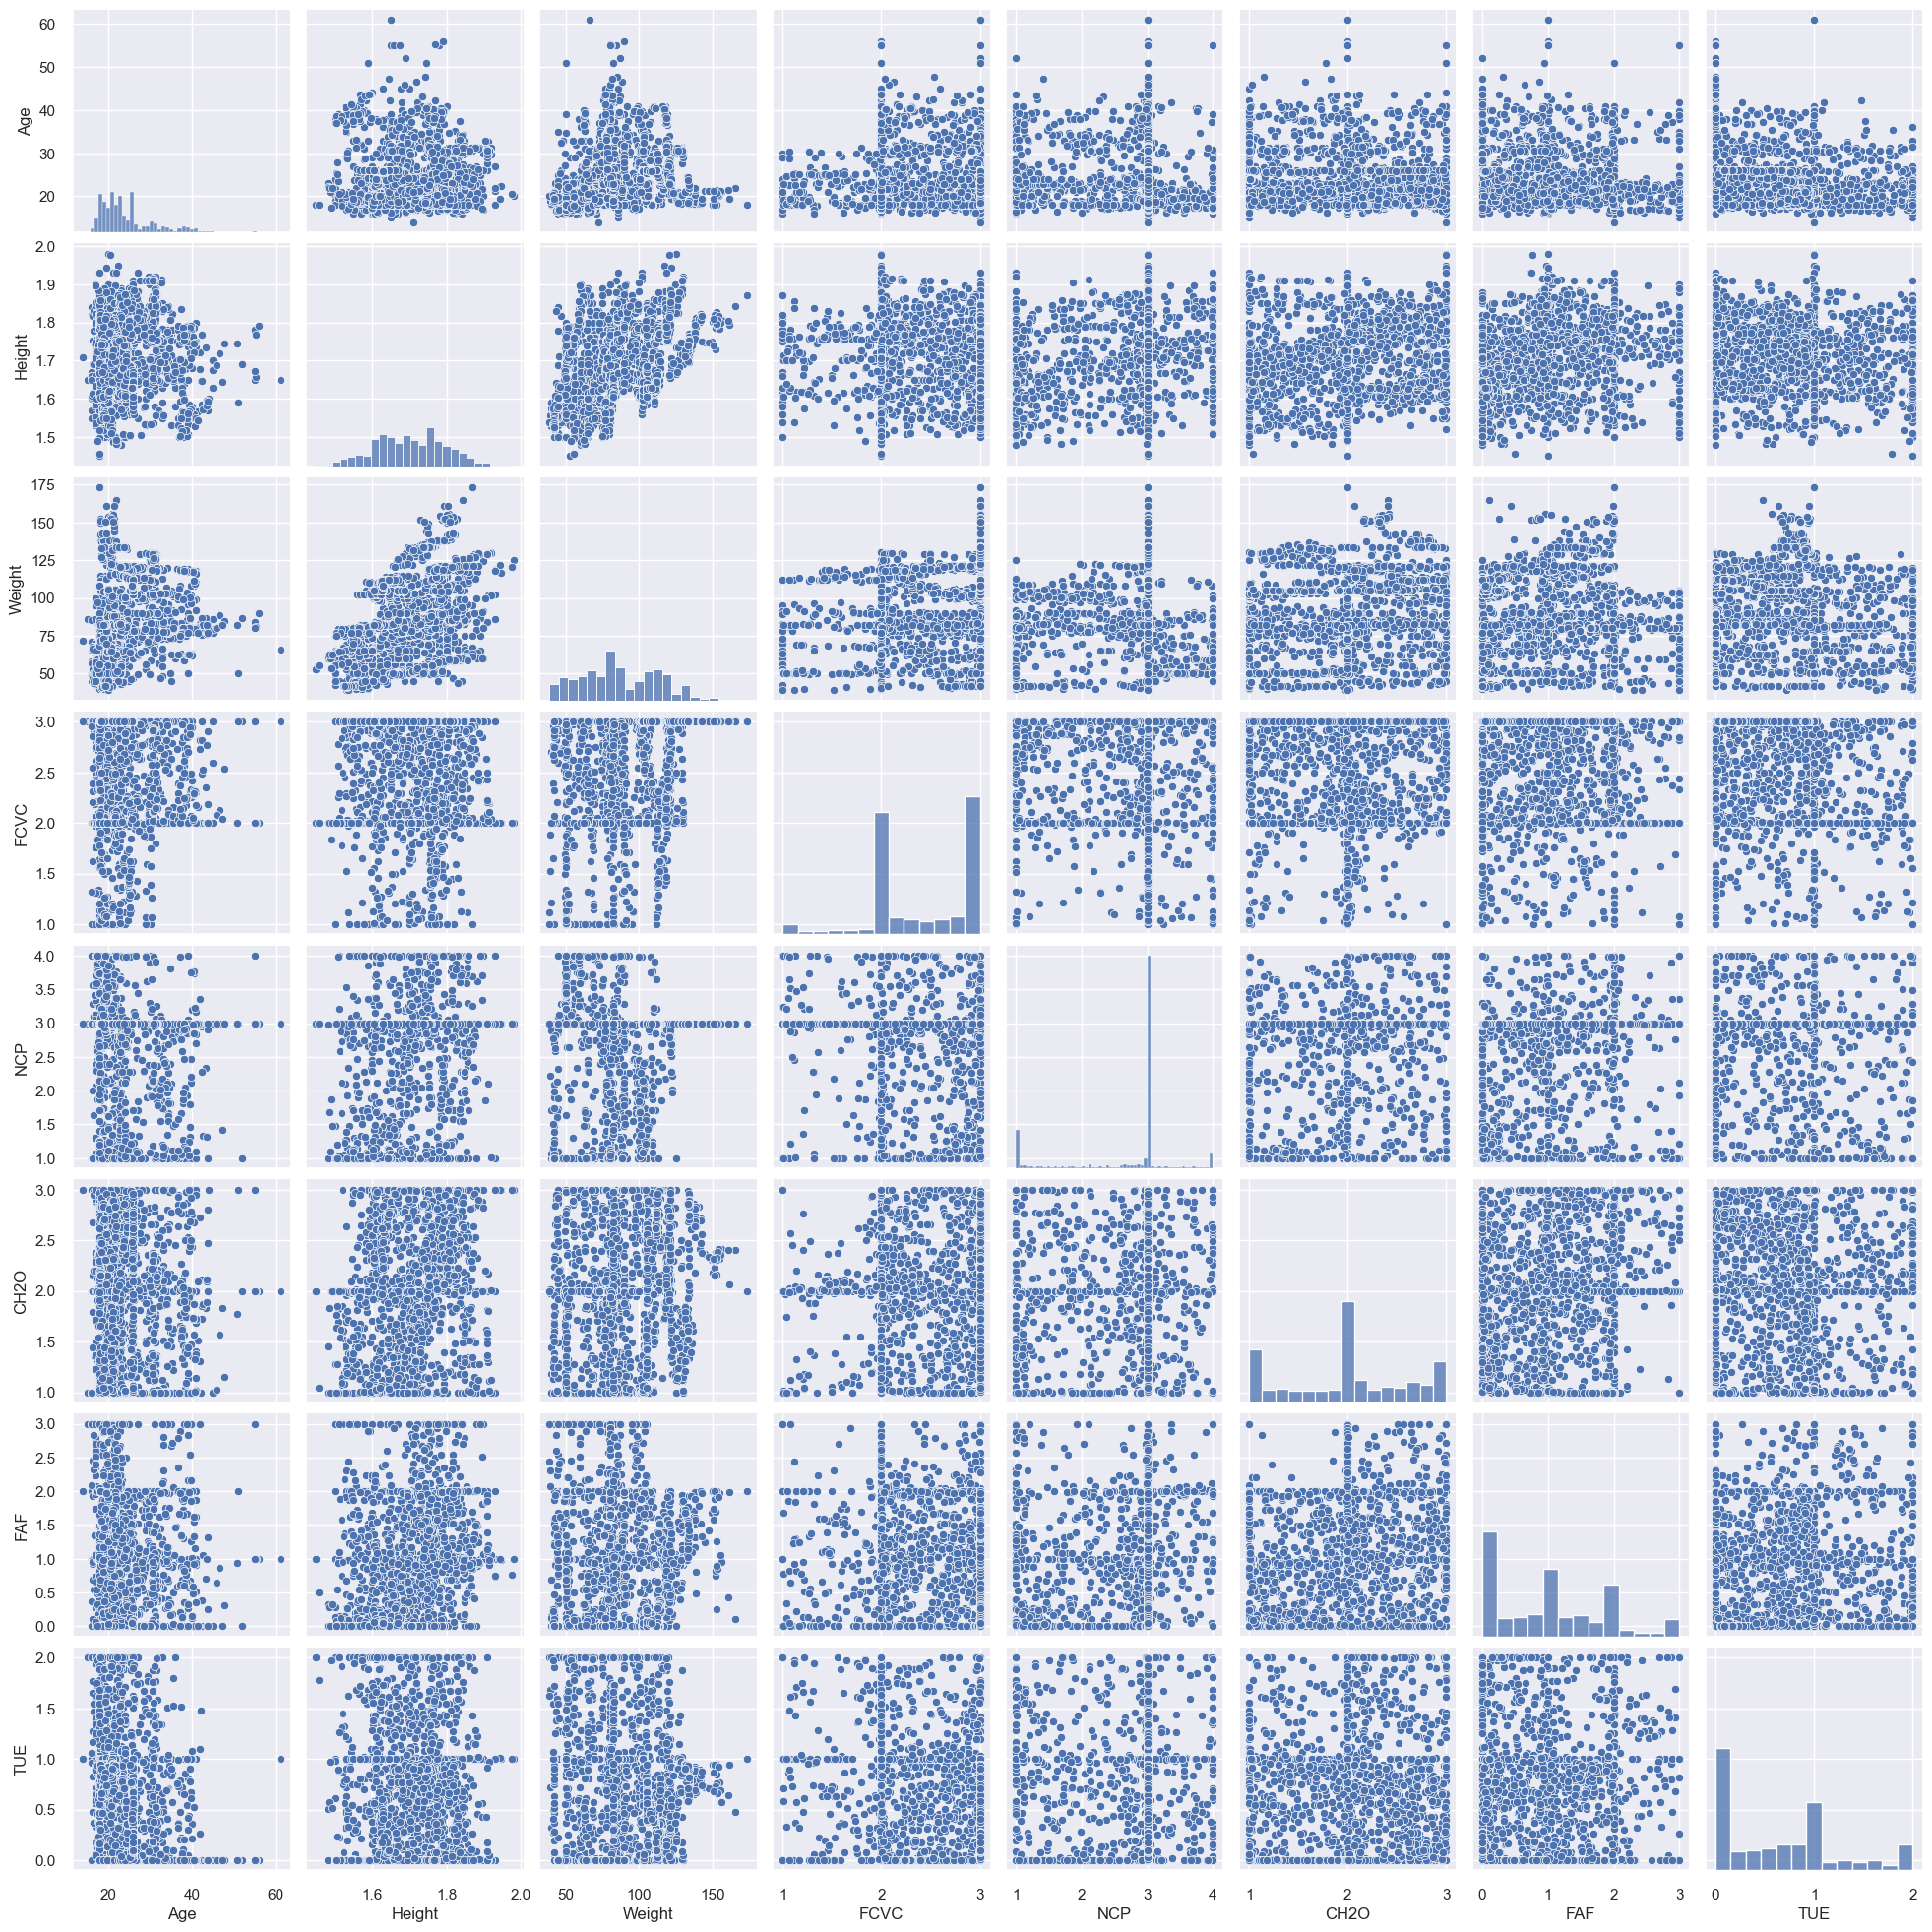

In [36]:
sns.pairplot(df)
plt.show()

> From the plot: Age, Height, Weight seem to be normally distributed. We can't directly infer heavy correlation between the scatter plots except between Height and Weight which is expected.

### iii. Data Wrangling (features)

In [37]:
X.shape  # we have 15 features to be used as predictors

(2111, 15)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   object 
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [39]:
X.sample(4).T

413                    409   \
Gender                                           Male                 Female   
Age                                              33.0                   33.0   
Height                                           1.75                   1.55   
family_history_with_overweight                     no                    yes   
FAVC                                               no                    yes   
FCVC                                              2.0                    3.0   
NCP                                               3.0                    1.0   
CAEC                                        Sometimes              Sometimes   
SMOKE                                              no                     no   
CH2O                                              2.0                    3.0   
SCC                                               yes                     no   
FAF                                               1.0                    2.0   
TUE                                               0.0                    1.0   
CALC                                        Sometimes              Sometimes   
MTRANS                          Public_Transportation  Public_Transportation   

                                     356                    1079  
Gender                               Male                   Male  
Age                                  17.0              24.751511  
Height                                1.9               1.735343  
family_history_with_overweight         no                    yes  
FAVC                                   no                    yes  
FCVC                                  3.0               2.607335  
NCP                                   3.0                    3.0  
CAEC                            Sometimes              Sometimes  
SMOKE                                  no                     no  
CH2O                                  2.0                    2.0  
SCC                                    no                     no  
FAF                                   3.0               0.451009  
TUE                                   1.0               0.630866  
CALC                                   no              Sometimes  
MTRANS                            Walking  Public_Transportation

In [40]:
X.select_dtypes(include=["float"])  # numeric columns

Age    Height  FCVC  NCP      CH2O       FAF       TUE
0     21.000000  1.620000   2.0  3.0  2.000000  0.000000  1.000000
1     21.000000  1.520000   3.0  3.0  3.000000  3.000000  0.000000
2     23.000000  1.800000   2.0  3.0  2.000000  2.000000  1.000000
3     27.000000  1.800000   3.0  3.0  2.000000  2.000000  0.000000
4     22.000000  1.780000   2.0  1.0  2.000000  0.000000  0.000000
...         ...       ...   ...  ...       ...       ...       ...
2106  20.976842  1.710730   3.0  3.0  1.728139  1.676269  0.906247
2107  21.982942  1.748584   3.0  3.0  2.005130  1.341390  0.599270
2108  22.524036  1.752206   3.0  3.0  2.054193  1.414209  0.646288
2109  24.361936  1.739450   3.0  3.0  2.852339  1.139107  0.586035
2110  23.664709  1.738836   3.0  3.0  2.863513  1.026452  0.714137

[2111 rows x 7 columns]

In [41]:
X.describe()

Age       Height         FCVC          NCP         CH2O  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677     2.419043     2.685628     2.008011   
std       6.345968     0.093305     0.533927     0.778039     0.612953   
min      14.000000     1.450000     1.000000     1.000000     1.000000   
25%      19.947192     1.630000     2.000000     2.658738     1.584812   
50%      22.777890     1.700499     2.385502     3.000000     2.000000   
75%      26.000000     1.768464     3.000000     3.000000     2.477420   
max      61.000000     1.980000     3.000000     4.000000     3.000000   

               FAF          TUE  
count  2111.000000  2111.000000  
mean      1.010298     0.657866  
std       0.850592     0.608927  
min       0.000000     0.000000  
25%       0.124505     0.000000  
50%       1.000000     0.625350  
75%       1.666678     1.000000  
max       3.000000     2.000000

> Mean and median of the numeric columns are near to each other

In [42]:
X.select_dtypes(include=["object"])  # categorical columns

Gender family_history_with_overweight FAVC       CAEC SMOKE  SCC  \
0     Female                            yes   no  Sometimes    no   no   
1     Female                            yes   no  Sometimes   yes  yes   
2       Male                            yes   no  Sometimes    no   no   
3       Male                             no   no  Sometimes    no   no   
4       Male                             no   no  Sometimes    no   no   
...      ...                            ...  ...        ...   ...  ...   
2106  Female                            yes  yes  Sometimes    no   no   
2107  Female                            yes  yes  Sometimes    no   no   
2108  Female                            yes  yes  Sometimes    no   no   
2109  Female                            yes  yes  Sometimes    no   no   
2110  Female                            yes  yes  Sometimes    no   no   

            CALC                 MTRANS  
0             no  Public_Transportation  
1      Sometimes  Public_Transportation  
2     Frequently  Public_Transportation  
3     Frequently                Walking  
4      Sometimes  Public_Transportation  
...          ...                    ...  
2106   Sometimes  Public_Transportation  
2107   Sometimes  Public_Transportation  
2108   Sometimes  Public_Transportation  
2109   Sometimes  Public_Transportation  
2110   Sometimes  Public_Transportation  

[2111 rows x 8 columns]

In [43]:
for col in X.select_dtypes(include=["object"]):
    print(X[col].value_counts())
    print("~"*50)

Gender
Male      1068
Female    1043
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
FAVC
yes    1866
no      245
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SMOKE
no     2067
yes      44
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
SCC
no     2015
yes      96
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike              

> These all seem to be textual, but they are actually just categorical columns, so we can encode them by one-hot encoding or label encoder. There is also an inherent imbalance in all other columns excluding gender.

In [44]:
X.head(4).T

0                      1  \
Gender                                         Female                 Female   
Age                                              21.0                   21.0   
Height                                           1.62                   1.52   
family_history_with_overweight                    yes                    yes   
FAVC                                               no                     no   
FCVC                                              2.0                    3.0   
NCP                                               3.0                    3.0   
CAEC                                        Sometimes              Sometimes   
SMOKE                                              no                    yes   
CH2O                                              2.0                    3.0   
SCC                                                no                    yes   
FAF                                               0.0                    3.0   
TUE                                               1.0                    0.0   
CALC                                               no              Sometimes   
MTRANS                          Public_Transportation  Public_Transportation   

                                                    2           3  
Gender                                           Male        Male  
Age                                              23.0        27.0  
Height                                            1.8         1.8  
family_history_with_overweight                    yes          no  
FAVC                                               no          no  
FCVC                                              2.0         3.0  
NCP                                               3.0         3.0  
CAEC                                        Sometimes   Sometimes  
SMOKE                                              no          no  
CH2O                                              2.0         2.0  
SCC                                                no          no  
FAF                                               2.0         2.0  
TUE                                               1.0         0.0  
CALC                                       Frequently  Frequently  
MTRANS                          Public_Transportation     Walking

In [45]:
# label encoding categorical variables

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X_le = X.copy()
for col in X.select_dtypes(include=["object"]):
    
    X_le[col] = label_encoder.fit_transform(X[col])

X_le.head(4).T

0      1     2     3
Gender                           0.00   0.00   1.0   1.0
Age                             21.00  21.00  23.0  27.0
Height                           1.62   1.52   1.8   1.8
family_history_with_overweight   1.00   1.00   1.0   0.0
FAVC                             0.00   0.00   0.0   0.0
FCVC                             2.00   3.00   2.0   3.0
NCP                              3.00   3.00   3.0   3.0
CAEC                             2.00   2.00   2.0   2.0
SMOKE                            0.00   1.00   0.0   0.0
CH2O                             2.00   3.00   2.0   2.0
SCC                              0.00   1.00   0.0   0.0
FAF                              0.00   3.00   2.0   2.0
TUE                              1.00   0.00   1.0   0.0
CALC                             3.00   2.00   1.0   1.0
MTRANS                           3.00   3.00   3.0   4.0

In [46]:
X_le.info()  # all categorical are encoded with integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   int32  
 4   FAVC                            2111 non-null   int32  
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   int32  
 8   SMOKE                           2111 non-null   int32  
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   int32  
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [47]:
X_le.isna().sum()  # no missing values, no need to impute or drop

Gender                            0
Age                               0
Height                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

### iv. Modelling

In [48]:
# train-val split to perform hyperparameter tuning

from sklearn.model_selection import train_test_split

# 75% - 25% split (generally, also a hyperparameter)
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size=0.25, shuffle=True, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1583, 15), (528, 15), (1583,), (528,))

#### a. Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [50]:
# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Create a Grid Search cross-validator
grid_search = GridSearchCV(estimator=linear_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R-squared: {r2:.5f}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Mean Squared Error: 301.78330
R-squared: 0.55141


> R2 value is very low and MSE error is high

#### b. Support Vector Regression

In [51]:
from sklearn.svm import SVR

# Create a Support Vector Regression model
sv_regressor = SVR()
sv_regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [52]:
# Define hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type ('linear', 'rbf', or 'poly')
    'C': [0.1, 1, 10],                   # Regularization parameter
    'epsilon': [0.1, 0.01, 0.001],       # Epsilon parameter in the epsilon-insensitive loss functionsvr_poly
}

# Create a Grid Search cross-validator
grid_search = GridSearchCV(estimator=sv_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R-squared: {r2:.5f}")

Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error: 314.33939
R-squared: 0.53275


> Even with a possibility of non-linear kernel, support vector regressor didn't perform as well

#### c. Random Forest Regression

In [53]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [54]:
# Define hyperparameters to tune
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500, 1000], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider at each split
}

# Create a Randomized Search cross-validator
random_search = RandomizedSearchCV(estimator=rf_regressor,
                                   param_distributions=param_distributions,
                                   n_iter=25,
                                   random_state=7,
                                   cv=5, scoring='neg_mean_squared_error',
                                   n_jobs=-1)

# Perform the randomized search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R-squared: {r2:.5f}")

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Mean Squared Error: 75.81767
R-squared: 0.88730


> Random forest performs much better than simple linear regression or support vector regression, this implies the data is not very simply linear. We require non-linear methods

In [55]:
# training random forest using the best parameters through cross-validation
# instead of train-val split as we have a small corpus and ideally, we want to use all the data for training

from sklearn.model_selection import cross_val_predict, KFold


# Initialize a Random Forest Regressor
# with best parameters obtained through hyperparameter tuning
rf_regressor = RandomForestRegressor(n_estimators=1000,
                                     min_samples_split=2,
                                     min_samples_leaf=1,
                                     max_features='sqrt',
                                     max_depth=20)

# Create a KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(rf_regressor, X_le, y, cv=kfold)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"R-squared: {r2:.5f}")

Mean Squared Error: 64.33971
R-squared: 0.90616


> Hence, we can see the best MSE error value of `64` and a good R2 value of `0.9`, We can consider this model the champion model for this toy obesity dataset

## References

‌[1] Silhouette Visualizer — Yellowbrick v1.5 documentation n.d., www.scikit-yb.org, viewed 22 July 2023, <https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html?highlight=silhouette><br>
[2] scikit-learn 2019, sklearn.cluster.KMeans — scikit-learn 0.21.3 documentation, Scikit-learn.org<br>
[3] www.datacamp.com. (n.d.). Python t-SNE with Matplotlib. [online] Available at: https://www.datacamp.com/tutorial/introduction-t-sne<br>
[4] Team, G.L. (2020). What is Curse of Dimensionality in Machine Learning? [online] GreatLearning Blog: Free Resources what Matters to shape your Career! Available at: https://www.mygreatlearning.com/blog/understanding-curse-of-dimensionality/<br>
[5] Karanam, S. (2021). Curse of Dimensionality — A ‘Curse’ to Machine Learning. [online] Medium. Available at: https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb<br>
[6] SciKit-Learn (2009). 3.1. Cross-validation: evaluating estimator performance — scikit-learn 0.21.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/cross_validation.html.
